In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import matplotlib.pyplot as plt
import numpy as np
language_model = spacy.load("en_core_web_sm")
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')  # Tokenizer data
nltk.download('wordnet') 
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/ashash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ashash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ashash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ashash/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
onion = pd.read_csv('/Users/ashash/Desktop/IS310 webs/data/theonion_scraped_articles.csv')
onion

,type,link,title,text
0,politics,https://theonion.com/youre-the-bonnie-to-my-cl...,"‘You’re The Bonnie To My Clyde,’ Says Biden Ru...","Black Friday Sale: Get the Paper. Wednesday, N..."
1,politics,https://theonion.com/fact-checking-rfk-jr-on-h...,Fact-Checking RFK Jr. On Health,"Black Friday Sale: Get the Paper. Wednesday, N..."
2,politics,https://theonion.com/nancy-mace-introduces-bil...,Nancy Mace Introduces Bill That Would Ban Tran...,"Black Friday Sale: Get the Paper. Wednesday, N..."
3,politics,https://theonion.com/political-profile-matt-ga...,Political Profile: Matt Gaetz,"Black Friday Sale: Get the Paper. Wednesday, N..."
4,politics,https://theonion.com/trump-admits-entire-polit...,Trump Admits Entire Political Career Has Been ...,"Black Friday Sale: Get the Paper. Wednesday, N..."
5,politics,https://theonion.com/trump-boys-get-weird-feel...,Trump Boys Get Weird Feeling After Uncle Elon ...,"Black Friday Sale: Get the Paper. Wednesday, N..."
6,politics,https://theonion.com/dnc-chair-its-not-a-waste...,DNC Chair: It’s Not A Waste Of Money If It Mak...,"Black Friday Sale: Get the Paper. Wednesday, N..."
7,politics,https://theonion.com/joe-biden-given-human-foo...,Joe Biden Given Human Food As Birthday Treat,"Black Friday Sale: Get the Paper. Wednesday, N..."
8,politics,https://theonion.com/trump-locks-bathroom-door...,Trump Locks Bathroom Door So Elon Musk Can’t F...,"Black Friday Sale: Get the Paper. Wednesday, N..."
9,politics,https://theonion.com/biden-authorizes-ukraine-...,Biden Authorizes Ukraine To Use Long-Range Wea...,"Black Friday Sale: Get the Paper. Wednesday, N..."


In [4]:
onion['text'] = onion['text'].str.replace('Black Friday Sale: Get the Paper. Wednesday, November 27, 2024 64° Electromagnetic storm, raining aircraft America’s Finest News Source Wednesday, November 27, 2024 64° Electromagnetic storm, raining aircraft Black Friday Sale: Get Merch. Share Share', '', regex=False)
onion


,type,link,title,text
0,politics,https://theonion.com/youre-the-bonnie-to-my-cl...,"‘You’re The Bonnie To My Clyde,’ Says Biden Ru...",Published: WASHINGTON—Participating in the an...
1,politics,https://theonion.com/fact-checking-rfk-jr-on-h...,Fact-Checking RFK Jr. On Health,"Published: Robert F. Kennedy Jr., Donald Trum..."
2,politics,https://theonion.com/nancy-mace-introduces-bil...,Nancy Mace Introduces Bill That Would Ban Tran...,Published: WASHINGTON—With widespread support...
3,politics,https://theonion.com/political-profile-matt-ga...,Political Profile: Matt Gaetz,Published: President-elect Donald Trump selec...
4,politics,https://theonion.com/trump-admits-entire-polit...,Trump Admits Entire Political Career Has Been ...,"Published: PALM BEACH, FL—Revealing that the ..."
5,politics,https://theonion.com/trump-boys-get-weird-feel...,Trump Boys Get Weird Feeling After Uncle Elon ...,"Published: PALM BEACH, FL—Blushing, short of ..."
6,politics,https://theonion.com/dnc-chair-its-not-a-waste...,DNC Chair: It’s Not A Waste Of Money If It Mak...,Published: Advertising Explore Tags Related C...
7,politics,https://theonion.com/joe-biden-given-human-foo...,Joe Biden Given Human Food As Birthday Treat,Published: WASHINGTON—After bending the rules...
8,politics,https://theonion.com/trump-locks-bathroom-door...,Trump Locks Bathroom Door So Elon Musk Can’t F...,"Published: PALM BEACH, FL—Admitting that ever..."
9,politics,https://theonion.com/biden-authorizes-ukraine-...,Biden Authorizes Ukraine To Use Long-Range Wea...,"Published: ‘I’m Ready, Man,’ Declares Weary P..."


In [5]:
ap = pd.read_csv('/Users/ashash/Desktop/IS310 webs/data/apnews_scraped_articles.csv')
ap

,type,link,title,text
0,politics,https://apnews.com/article/trump-transition-uk...,Trump selects longtime adviser Keith Kellogg a...,Copyright 2024 The Associated Press. All Right...
1,politics,https://apnews.com/article/ukraine-war-biden-d...,White House pressing Ukraine to draft 18-year-...,Copyright 2024 The Associated Press. All Right...
2,politics,https://apnews.com/article/ozempic-biden-wegov...,How millions of Americans with obesity may get...,Copyright 2024 The Associated Press. All Right...
3,politics,https://apnews.com/article/immigration-school-...,Trump's mass deportation pledge could keep imm...,Copyright 2024 The Associated Press. All Right...
4,politics,https://apnews.com/article/ap-votecast-2020-el...,"AP VoteCast: How Americans voted in 2020, and ...",Copyright 2024 The Associated Press. All Right...
5,politics,https://apnews.com/article/new-orleans-mayor-c...,New Orleans mayor launches own 'news' service ...,Copyright 2024 The Associated Press. All Right...
6,politics,https://apnews.com/article/biden-trump-israel-...,Trump team says Israel-Hezbollah ceasefire dea...,Copyright 2024 The Associated Press. All Right...
7,politics,https://apnews.com/article/trump-biden-transit...,Trump signs agreement with Biden White House t...,Copyright 2024 The Associated Press. All Right...
8,politics,https://apnews.com/article/trump-transition-bo...,"Trump transition says Cabinet picks, appointee...",Copyright 2024 The Associated Press. All Right...
9,politics,https://apnews.com/article/us-china-americans-...,3 Americans held for years in China have been ...,Copyright 2024 The Associated Press. All Right...


In [6]:
ap['text'] = ap['text'].str.replace('Copyright 2024 The Associated Press. All Rights Reserved.', '', regex=False)
ap

,type,link,title,text
0,politics,https://apnews.com/article/trump-transition-uk...,Trump selects longtime adviser Keith Kellogg a...,FILE - Ret. Lt. Gen. Keith Kellogg speaks to ...
1,politics,https://apnews.com/article/ukraine-war-biden-d...,White House pressing Ukraine to draft 18-year-...,Fellow soldiers carry a coffin of leading act...
2,politics,https://apnews.com/article/ozempic-biden-wegov...,How millions of Americans with obesity may get...,FILE - Donna Cooper holds up a dosage of Wego...
3,politics,https://apnews.com/article/immigration-school-...,Trump's mass deportation pledge could keep imm...,FILE - An American flag hangs in a classroom ...
4,politics,https://apnews.com/article/ap-votecast-2020-el...,"AP VoteCast: How Americans voted in 2020, and ...",AP VoteCast looks at the top issues for Texas...
5,politics,https://apnews.com/article/new-orleans-mayor-c...,New Orleans mayor launches own 'news' service ...,NEW ORLEANS (AP) — New Orleans Mayor LaToya C...
6,politics,https://apnews.com/article/biden-trump-israel-...,Trump team says Israel-Hezbollah ceasefire dea...,President Joe Biden on Tuesday called Israel ...
7,politics,https://apnews.com/article/trump-biden-transit...,Trump signs agreement with Biden White House t...,President Joe Biden meets with President-elec...
8,politics,https://apnews.com/article/trump-transition-bo...,"Trump transition says Cabinet picks, appointee...",President-elect Donald Trump arrives to speak...
9,politics,https://apnews.com/article/us-china-americans-...,3 Americans held for years in China have been ...,FILE - Harrison Li holds a photo of his fathe...


In [7]:
onion['label'] = 0  # Label for The Onion (satirical news)
ap['label'] = 1     # Label for AP News (factual news)

# Combine the two dataframes
combined_df = pd.concat([onion, ap], ignore_index=True)

# Save the combined dataframe to a new CSV (optional)
combined_df.to_csv('combined_news.csv', index=False)

# Display the first few rows of the combined dataframe
combined_df


,type,link,title,text,label
0,politics,https://theonion.com/youre-the-bonnie-to-my-cl...,"‘You’re The Bonnie To My Clyde,’ Says Biden Ru...",Published: WASHINGTON—Participating in the an...,0
1,politics,https://theonion.com/fact-checking-rfk-jr-on-h...,Fact-Checking RFK Jr. On Health,"Published: Robert F. Kennedy Jr., Donald Trum...",0
2,politics,https://theonion.com/nancy-mace-introduces-bil...,Nancy Mace Introduces Bill That Would Ban Tran...,Published: WASHINGTON—With widespread support...,0
3,politics,https://theonion.com/political-profile-matt-ga...,Political Profile: Matt Gaetz,Published: President-elect Donald Trump selec...,0
4,politics,https://theonion.com/trump-admits-entire-polit...,Trump Admits Entire Political Career Has Been ...,"Published: PALM BEACH, FL—Revealing that the ...",0
5,politics,https://theonion.com/trump-boys-get-weird-feel...,Trump Boys Get Weird Feeling After Uncle Elon ...,"Published: PALM BEACH, FL—Blushing, short of ...",0
6,politics,https://theonion.com/dnc-chair-its-not-a-waste...,DNC Chair: It’s Not A Waste Of Money If It Mak...,Published: Advertising Explore Tags Related C...,0
7,politics,https://theonion.com/joe-biden-given-human-foo...,Joe Biden Given Human Food As Birthday Treat,Published: WASHINGTON—After bending the rules...,0
8,politics,https://theonion.com/trump-locks-bathroom-door...,Trump Locks Bathroom Door So Elon Musk Can’t F...,"Published: PALM BEACH, FL—Admitting that ever...",0
9,politics,https://theonion.com/biden-authorizes-ukraine-...,Biden Authorizes Ukraine To Use Long-Range Wea...,"Published: ‘I’m Ready, Man,’ Declares Weary P...",0


In [8]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [9]:
combined_df['cleaned_text'] = combined_df['text'].apply(clean)
combined_df['cleaned_text']

0     published washingtonparticipating in the annua...
1     published robert f kennedy jr donald trumps pi...
2     published washingtonwith widespread support fr...
3     published presidentelect donald trump selected...
4     published palm beach flrevealing that the stag...
5     published palm beach flblushing short of breat...
6     published advertising explore tags related cov...
7     published washingtonafter bending the rules wi...
8     published palm beach fladmitting that ever sin...
9     published im ready man declares weary presiden...
10    published washingtonpromising to end what he h...
11    published presidentelect donald trump has anno...
12    published washingtonresponding with visible ex...
13    published in addition to donald trumps resound...
14    published palm beach fllashing furiously at ea...
15    published chappaqua nypressing her finger to t...
16    published washingtoncalling on all democrats t...
17    file  ret lt gen keith kellogg speaks to r

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


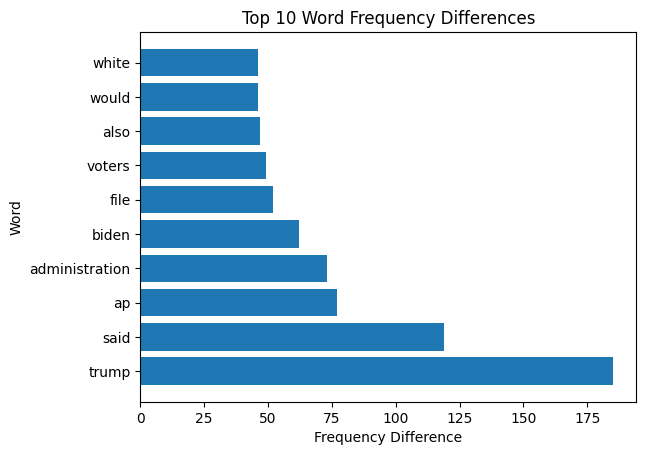

In [20]:
group_1 = combined_df[combined_df['label'] == 1]['text']
group_0 = combined_df[combined_df['label'] == 0]['text']

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

group_1_words = group_1.apply(preprocess).sum()  # Flatten list of lists
group_0_words = group_0.apply(preprocess).sum()

# Count word frequencies
group_1_freq = Counter(group_1_words)
group_0_freq = Counter(group_0_words)

# Find the differences in word frequencies
common_words = set(group_1_freq.keys()).union(set(group_0_freq.keys()))
word_diff = {word: group_1_freq[word] - group_0_freq[word] for word in common_words}

# Sort by absolute difference
sorted_diff = sorted(word_diff.items(), key=lambda x: abs(x[1]), reverse=True)

# Create a DataFrame for visualization
diff_df = pd.DataFrame(sorted_diff, columns=['Word', 'Frequency Difference'])

# Visualize top 10 differences
top_diff = diff_df.head(10)
plt.barh(top_diff['Word'], top_diff['Frequency Difference'])
plt.xlabel('Frequency Difference')
plt.ylabel('Word')
plt.title('Top 10 Word Frequency Differences')
plt.show()

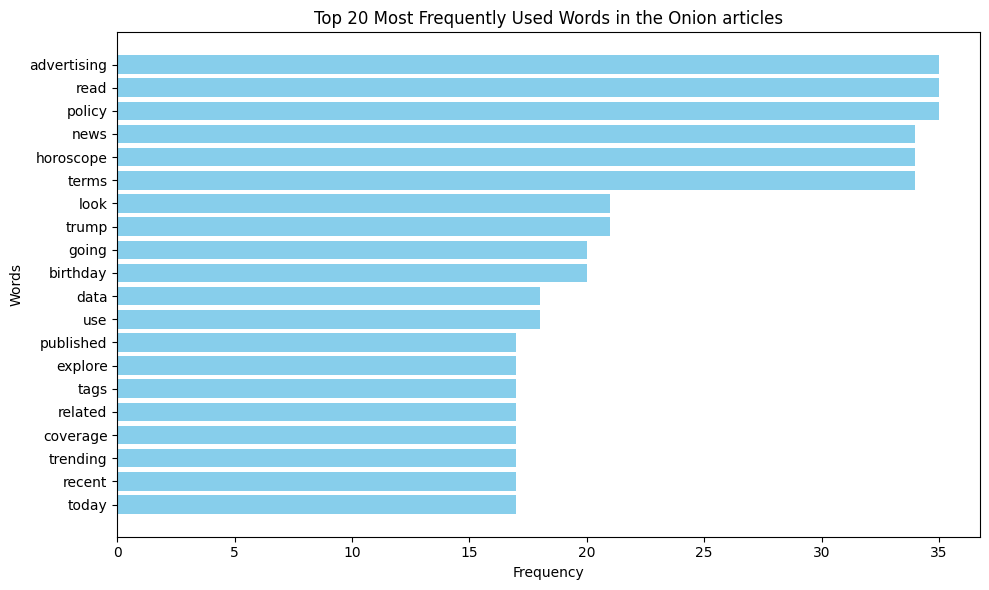

In [29]:
top_20_words0 = group_0_freq.most_common(20)
# Split words and their counts for plotting
words, counts = zip(*top_20_words0)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequently Used Words in the Onion articles')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent on top
plt.tight_layout()
plt.show()

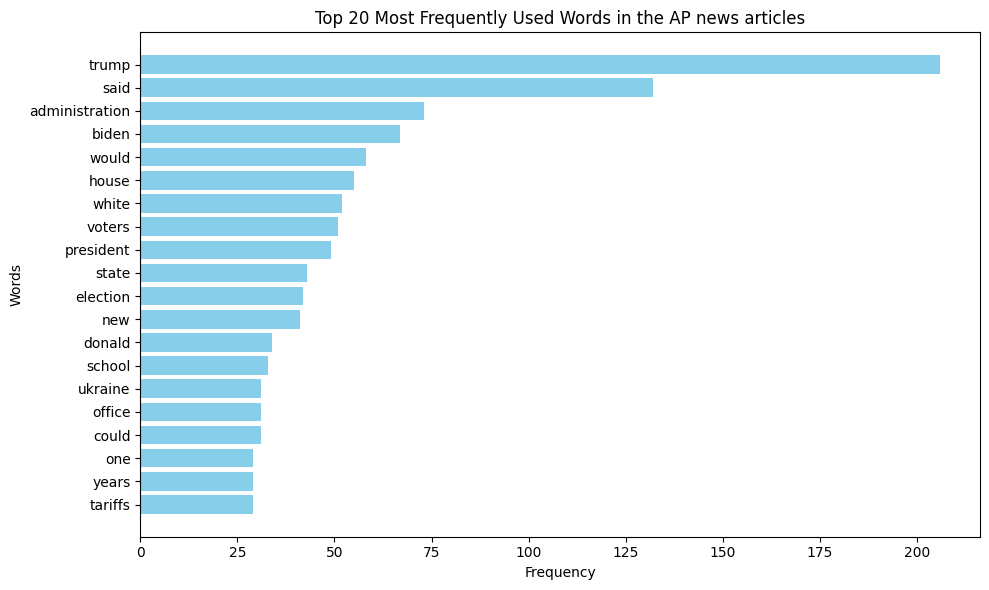

In [28]:
words_to_remove = {'file', 'also', 'ap'}
for word in words_to_remove:
    if word in group_1_freq:
        del group_1_freq[word]

top_20_words1 = group_1_freq.most_common(20)
# Split words and their counts for plotting
words, counts = zip(*top_20_words1)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequently Used Words in the AP news articles')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent on top
plt.tight_layout()
plt.show()

In [10]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize text
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
    return ' '.join(lemmatized)

In [11]:
combined_df['lemmatized_text'] = combined_df['cleaned_text'].apply(lemmatize_text)
combined_df['lemmatized_text'][0]


'published washingtonparticipating in the annual tradition one last time before leaving office president joe biden reportedly told a pardoned thanksgiving turkey youre the bonnie to my clyde on monday before running off with it and disappearing over the horizon it u against the world now turkey said the commanderinchief grabbing the bird by the wing and laughing wildly a the two of them fled the white house ground in a convertible the turkey handler in hot pursuit theyre going to keep coming after u you know but ive got your back and i know youve got mine itll be just you me and the wide open road together until the end dont worry ive got a cozy little place in delaware we can hide out in until thing die down at press time biden urged the turkey to take the wheel so that he could fend off the secret service agent on their tail advertising explore tag related coverage advertising trending news recent news read more your horoscope today birthday sagittarius november to december youre goi

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example corpus

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(combined_df['lemmatized_text'])
word_index = tokenizer.word_index

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(combined_df['lemmatized_text'])

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

print(padded_sequences)


2024-12-04 16:38:55.415439: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[ 188 1738    7 ... 1752   23  169]
 [ 188  435  579 ...   28    4 1168]
 [ 188 1779  587 ... 1792  441    4]
 ...
 [  52   43   33 ...  808  214  289]
 [1701  244   48 ... 1705  154 1614]
 [  52  435  579 ...    4 3593   50]]


In [13]:
print(combined_df.columns)

Index(['type', 'link', 'title', 'text', 'label', 'cleaned_text',
       'lemmatized_text'],
      dtype='object')


In [16]:
# Assign padded_sequences to X and labels to y
X = padded_sequences  # Feature matrix
y = combined_df['label']  # Extract the label column

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense

# Vocabulary size, sequence length, and embedding dimensions
vocab_size = 10000  # Total number of words in tokenizer
sequence_length = 100  # Length of each padded sequence
embedding_dim = 128  # Size of the embedding vector

model = Sequential([
    # Embedding layer
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    
    # Bidirectional GRU layer
    Bidirectional(GRU(64, return_sequences=False)),  # Single GRU layer
    
    # Fully connected layer
    Dense(64, activation='relu'),
    
    # Output layer
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Build the model with an input shape
model.build(input_shape=(None, sequence_length))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
print(model.summary())


/Users/ashash/anaconda3/envs/is310/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,362,817 (5.20 MB)

 Trainable params: 1,362,817 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
print(type(X_test[0]))  # Example for training labels
print(X_test[:5])       # Inspect first few labels


<class 'numpy.ndarray'>
[[ 188 2081 2082  124 1265    4    2  626 2083  239 2084    6  931  124
    30    4   23 2085    3 2086 2087 2088  433 2089  328   91    4  237
   124  111    2 1267 1202  627  256   13   82   10   55    4  715  285
  1261    2 2090 2091    4    2 2092    5 2093   12    2  166  151  150
  1268  315  124 2094 2095 2096    6 2097    3  724    4   91    3  299
  2098 2099   21    3 2100 2101 2102    3 2103 2104 2105    4 2106    2
   366   46    8   13   29   44   23 2107  109   32 2108  290  252    2
  2109 1269]
 [  52 1341 2277  402   97    3 2278    5  649    3   78 1342   10  976
   332   19  124  243 1343    7 2279 2280 2281   25  465 2282   52  104
    25  277    5  650   65   29  209  305    4  466 2283 2284    8   29
   184  133 2285 1344  523   85    3  258  467   21    2   37   27   15
  2286   22   93   62    9    2  730 2287  114   22    2   89    6  436
   249  206   29  459  186    6  306    4  468  651   78  113  649   58
   977   10    3  469  978 

In [17]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['1', '0'])
idx = 0  # Example test instance
exp = explainer.explain_instance(combined_df[idx], model.predict, num_features=10)
exp.show_in_notebook()


KeyError: 0

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Keyword Analysis
tfidf = TfidfVectorizer(max_features=20)  # Adjust number of features as needed
tfidf.fit(X_train[y_train == 1])  # For misinformation
misinfo_keywords = tfidf.get_feature_names_out()

tfidf.fit(X_train[y_train == 0])  # For credible news
credible_keywords = tfidf.get_feature_names_out()

print("Keywords in misinformation news:", misinfo_keywords)
print("Keywords in credible news:", credible_keywords)


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [18]:
from textblob import TextBlob

# Sentiment Analysis
misinfo_sentiments = [TextBlob(article).sentiment.polarity for article in misinformation_data]
credible_sentiments = [TextBlob(article).sentiment.polarity for article in credible_data]

print("Average sentiment for misinformation:", sum(misinfo_sentiments) / len(misinfo_sentiments))
print("Average sentiment for credible news:", sum(credible_sentiments) / len(credible_sentiments))


ModuleNotFoundError: No module named 'textblob'

In [ ]:
import spacy
# Sentence Structure Analysis
nlp = spacy.load("en_core_web_sm")

for article in misinformation_data[:5]:  # Analyze sample articles
    doc = nlp(article)
    print(f"Avg sentence length: {sum(len(sent) for sent in doc.sents) / len(list(doc.sents))}")
    print(f"Part-of-speech tags: {[token.pos_ for token in doc]}")


In [50]:
import numpy as np

# Check shape of padded_sequences
print(f"Shape of X: {padded_sequences.shape}")  # Should be (num_samples, sequence_length)

# Convert y to numpy array if it's a Pandas Series
y = np.array(y)

print(f"Shape of y: {y.shape}")  # Should match number of samples


Shape of X: (34, 100)
Shape of y: (34,)


In [51]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.6190 - loss: 0.6898 - val_accuracy: 1.0000 - val_loss: 0.6767
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9524 - loss: 0.6745 - val_accuracy: 1.0000 - val_loss: 0.6686
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9524 - loss: 0.6599 - val_accuracy: 1.0000 - val_loss: 0.6604
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9524 - loss: 0.6443 - val_accuracy: 1.0000 - val_loss: 0.6509
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.9524 - loss: 0.6272 - val_accuracy: 1.0000 - val_loss: 0.6402
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9524 - loss: 0.6084 - val_accuracy: 1.0000 - val_loss: 0.6279
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 1.0000 - loss: 0.5875 - val_accuracy: 1.0000 - val_loss: 0.6141
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 0.5645 - val_accuracy: 1.0000 - val_loss: 0.

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


In [13]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(onion['cleaned_text'])

In [21]:
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [22]:
onion['lemmatized_text'] = onion['cleaned_text'].apply(lemmatize)

In [23]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(onion['lemmatized_text'])

In [24]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

president        10
candidate         8
voter             7
white house       7
white             7
house             7
monday            7
like              6
ballot            6
day               6
donald            6
find              5
people            5
voting            5
donald trump      5
want              5
election day      5
leave             5
confirm           5
hold              4
reporter          4
poll              4
report            4
stop              4
share             4
allow             4
spend             4
look              4
go                4
effort            4
worker            4
think             3
thursday          3
tell reporter     3
trumps            3
staff             3
tuesday           3
tell              3
way               3
state             3
add               3
need              3
source            3
republican        3
presidential      3
pass              3
minute            3
million           3
issue             3
gov               3


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example corpus
texts = ["Fake news is everywhere", "This is a true story"]

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

print(padded_sequences)


2024-11-27 21:02:15.474665: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[3 4 2 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [6 2 7 8 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
